In [18]:
import webbrowser
from multiprocessing.spawn import get_preparation_data

# INITIAL IMPORTS OF PACKAGES AND NECESSARY FILES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from fontTools.feaLib.variableScalar import Location
from scipy import stats
import seaborn as sns
%matplotlib inline

data = pd.read_csv('phivolcs_earthquake_data.csv')
data.head


<bound method NDFrame.head of               Date_Time_PH Latitude Longitude Depth_In_Km  Magnitude  \
0      2016-01-01 00:40:00    17.34    120.30         023        3.0   
1      2016-01-01 05:06:00    14.65    123.12         017        3.3   
2      2016-01-01 13:24:00    09.76    125.46         012        2.4   
3      2016-01-01 15:01:00    17.30    120.27         026        2.9   
4      2016-01-01 20:27:00    08.89    126.28         024        3.0   
...                    ...      ...       ...         ...        ...   
91673  2024-08-31 21:54:00    10.16    126.62         010        3.1   
91674  2024-08-31 22:11:00    13.85    120.54         163        3.0   
91675  2024-08-31 22:36:00    13.68    120.64         090        1.5   
91676  2024-08-31 22:49:00    13.76    120.16         008        1.7   
91677  2024-08-31 22:53:00    02.24    126.60         045        4.1   

                                                Location  
0             015 km N 87° W of San Esteban (I

In [19]:
# CLEANING DATA

data['Location'] = data['Location'].str.extract(r'\((.*?)\)')[0]
data[['Latitude', 'Longitude']] = data[['Latitude', 'Longitude']].replace('-', np.nan)
clean = data.dropna(subset=['Location'])
clean = data.dropna(subset=['Latitude', 'Longitude'])
clean = data.dropna()
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91574 entries, 0 to 91677
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date_Time_PH  91574 non-null  object 
 1   Latitude      91574 non-null  object 
 2   Longitude     91574 non-null  object 
 3   Depth_In_Km   91574 non-null  object 
 4   Magnitude     91574 non-null  float64
 5   Location      91574 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.9+ MB


In [41]:
clean.describe()

,Magnitude
count,91574.000000
mean,2.552561
std,0.695256
min,1.000000
25%,2.100000
50%,2.400000
75%,2.900000
max,7.500000


In [35]:
# DATAFRAME FOR DATASET
# For each block succeeding, run this block first to reset DataFrame before running desired block.
df = pd.DataFrame(clean)

In [34]:
# CEBU HEAT MAP

import folium
from folium.plugins import HeatMap

df= df[df['Location'].str.contains("Cebu")]

geodf = df[['Latitude', 'Longitude', 'Magnitude']]

center = [12.8797, 121.7740]
eqmap = folium.Map(location=center, zoom_start=5)

heat_data = [[float(row['Latitude']), float(row['Longitude']), row['Magnitude']] for index, row in geodf.iterrows()]

HeatMap(heat_data).add_to(eqmap)

eqmap.save('heatmap.html')


In [24]:
# HEAT MAP OF MAGNITUDES OVER 6.0

import folium
from folium.plugins import HeatMap

df= df[df['Magnitude'] > 6.0]

geodf = df[['Latitude', 'Longitude', 'Magnitude']]

center = [12.8797, 121.7740]
eqmap = folium.Map(location=center, zoom_start=5)

heat_data = [[float(row['Latitude']), float(row['Longitude']), row['Magnitude']] for index, row in geodf.iterrows()]

HeatMap(heat_data).add_to(eqmap)

eqmap.save('StrongQuakes_HeatMap.html')

In [38]:
# INITIAL DATE COUNTS OVER A 4-MONTH INTERVAL

df['Date_Time_PH'] = pd.to_datetime(df['Date_Time_PH'])

df.set_index('Date_Time_PH', inplace=True)

eqpermonth = df.resample('4ME').size()

eqpermonth

Date_Time_PH
2016-01-31     187
2016-05-31     212
2016-09-30       0
2017-01-31       0
2017-05-31       0
2017-09-30    1205
2018-01-31    1077
2018-05-31    1797
2018-09-30    2155
2019-01-31    2547
2019-05-31    4042
2019-09-30    3070
2020-01-31    6940
2020-05-31    4624
2020-09-30    4689
2021-01-31    3794
2021-05-31    3408
2021-09-30    5012
2022-01-31    3638
2022-05-31    4272
2022-09-30    5872
2023-01-31    4307
2023-05-31    4683
2023-09-30    4388
2024-01-31    8522
2024-05-31    6062
2024-09-30    5071
Freq: 4ME, dtype: int64

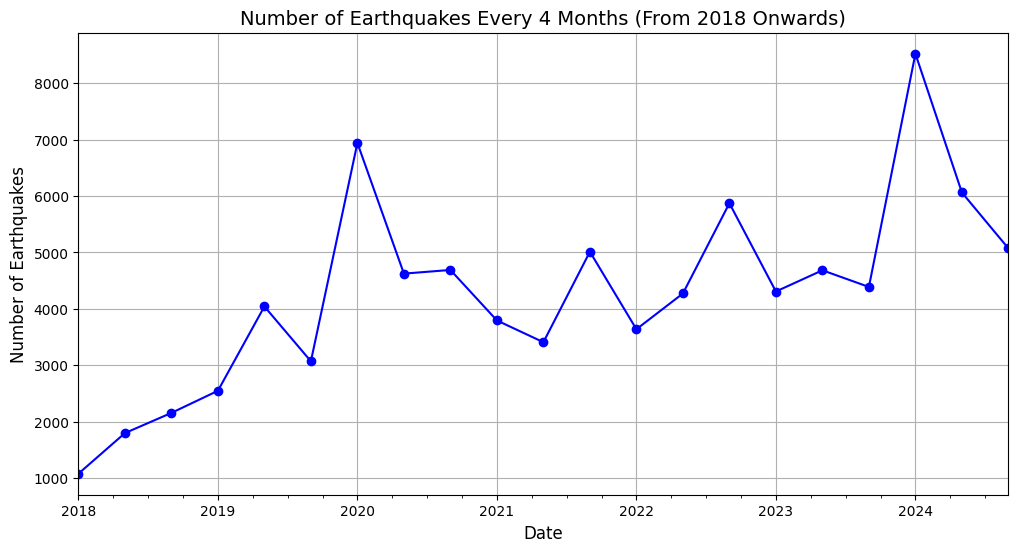

In [39]:
# TIME SERIES OVER A 4-MONTH INTERVAL STARTING FROM 2018
# Requires previous block to be run for 'eqpermonth' DataFrame

eqpermonth_2018 = eqpermonth['2018-01-01':]

plt.figure(figsize=(12, 6))
eqpermonth_2018.plot(kind='line', marker='o', color='b')

plt.title('Number of Earthquakes Every 4 Months (From 2018 Onwards)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)

plt.grid(True)
plt.show()

In [40]:
# EARTHQUAKE FREQUENCY OVER A 4-MONTH INTERVAL

earthquake_frequency = df.resample('4ME').size()

earthquake_frequency_clean = earthquake_frequency['2018-01-01':]
earthquake_frequency_clean

Date_Time_PH
2018-01-31    1077
2018-05-31    1797
2018-09-30    2155
2019-01-31    2547
2019-05-31    4042
2019-09-30    3070
2020-01-31    6940
2020-05-31    4624
2020-09-30    4689
2021-01-31    3794
2021-05-31    3408
2021-09-30    5012
2022-01-31    3638
2022-05-31    4272
2022-09-30    5872
2023-01-31    4307
2023-05-31    4683
2023-09-30    4388
2024-01-31    8522
2024-05-31    6062
2024-09-30    5071
Freq: 4ME, dtype: int64

In [42]:
# TOTAL COUNTS FOR EACH PROVINCE

location_sums = clean['Location'].value_counts()
print(location_sums)

Location
Surigao Del Sur             13052
Davao Oriental               6738
Surigao Del Norte            6441
Davao Occidental             5524
Batangas                     5096
                            ...  
Luzurriaga                      1
National Capital Region         1
Talisay                         1
Davao de Oro                    1
Municipality of Saranani        1
Name: count, Length: 215, dtype: int64


In [43]:
# MEAN, MEDIAN, MODE FOR MAGNITUDE

mean_mag = clean[['Magnitude']].mean()
median_mag = clean[['Magnitude']].median()
mode_mag = clean[['Magnitude']].mode()
print(mean_mag)
print(median_mag)
print(mode_mag)

Magnitude    2.552561
dtype: float64
Magnitude    2.4
dtype: float64
   Magnitude
0        2.0


In [44]:
# MINIMUM, MAXIMUM, RANGE, STANDARD DEVIATION, VARIANCE FOR MAGNITUDE

magnitude_min = df['Magnitude'].min()
magnitude_max = df['Magnitude'].max()
magnitude_range = magnitude_max - magnitude_min
magnitude_std = df['Magnitude'].std()
magnitude_var = df['Magnitude'].var()

print(magnitude_min)
print(magnitude_max)
print(magnitude_range)
print(magnitude_std)
print(magnitude_var)

1.0
7.5
6.5
0.6952556244738471
0.48338038336251915


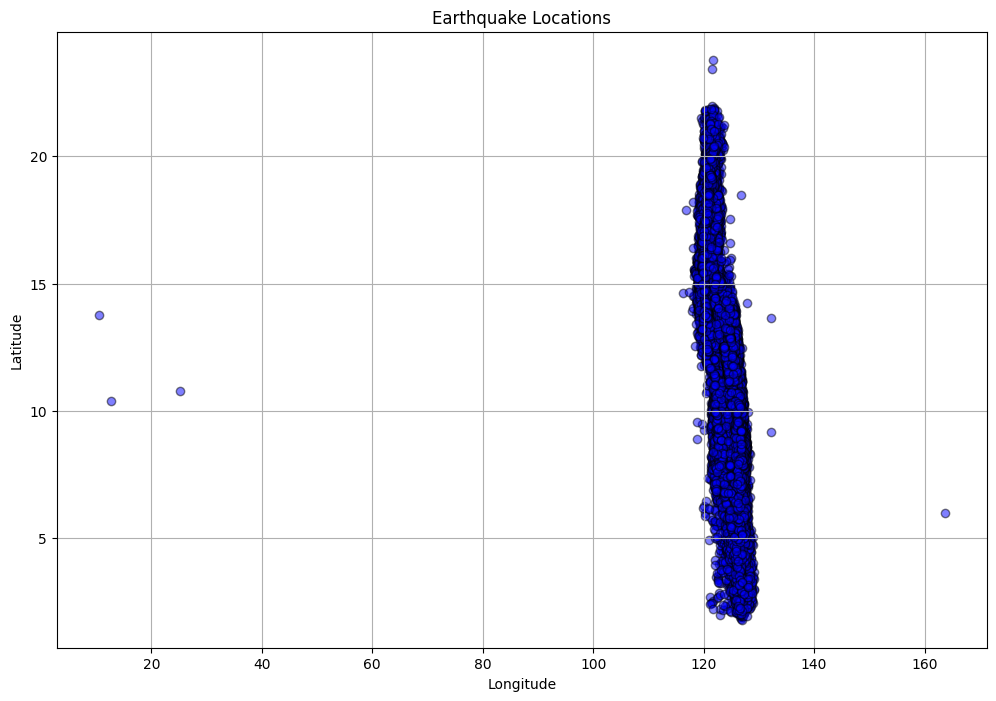

In [45]:
# SCATTER PLOT FOR EARTHQUAKE LOCATIONS

clean.loc[:, 'Longitude'] = pd.to_numeric(clean['Longitude'], errors='coerce')
clean.loc[:, 'Latitude'] = pd.to_numeric(clean['Latitude'], errors='coerce')

plt.figure(figsize=(12, 8))
plt.scatter(clean['Longitude'], clean['Latitude'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

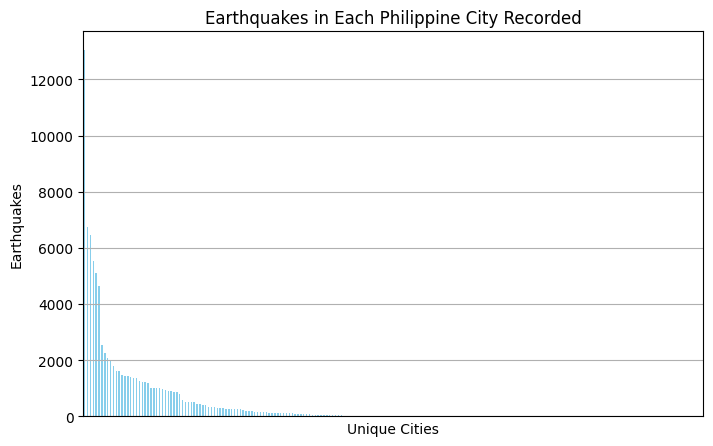

In [46]:
# PLOTTED GRAPH FOR TOTAL COUNTS PER PHILIPPINE CITY

plt.figure(figsize=(8, 5))
location_sums.plot(kind='bar', color='skyblue')
plt.title('Earthquakes in Each Philippine City Recorded')
plt.xlabel('Unique Cities')
plt.ylabel('Earthquakes')
plt.xticks([])
plt.grid(axis='y')
plt.show()


UFuncTypeError: Cannot cast ufunc 'svd_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

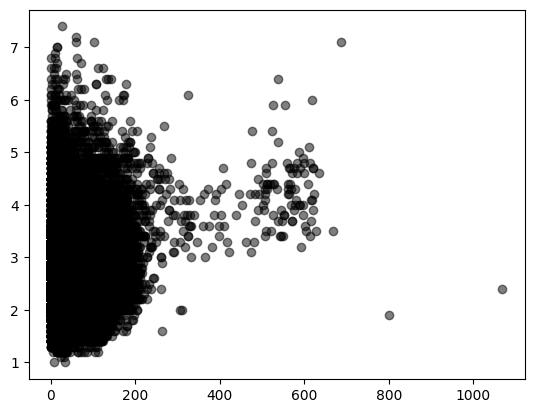

In [49]:
# SCATTER PLOT WITH REGRESSION LINE FOR DEPTH AND MAGNITUDE CORRELATION

# df['NumericData_Float'] = df['NumericData'].astype(float)
# clean['Depth_In_Km'] = clean['Depth_In_Km'].str.replace(r'[^0-9.]', '', regex=True)
clean.loc[:,'Depth_In_Km'] = pd.to_numeric(clean['Depth_In_Km'], errors='coerce')
clean.loc[:,'Magnitude'] = pd.to_numeric(clean['Magnitude'], errors='coerce')
clean = clean.dropna(subset=['Depth_In_Km'])
clean = clean[clean['Depth_In_Km'] != 0]


sns.regplot(x = "Depth_In_Km", y = "Magnitude", data = clean, scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

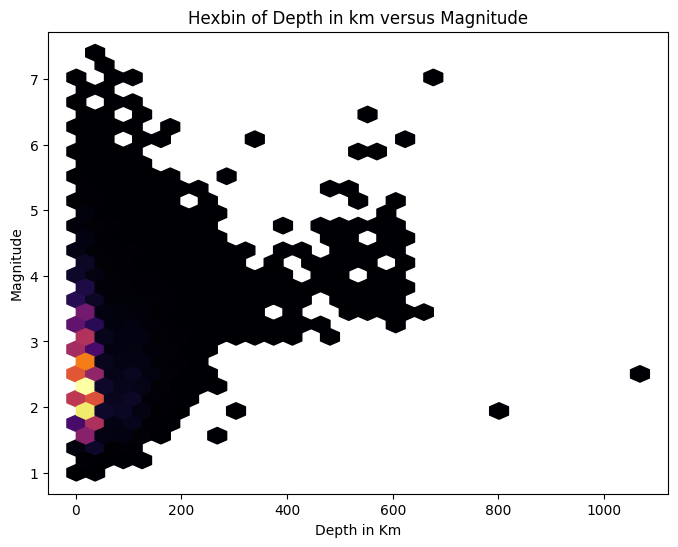

In [50]:
# HEXBIN PLOT FOR DEPTH VS MAGNITUDE

plt.figure(figsize=(8, 6))
plt.hexbin(clean['Depth_In_Km'], clean['Magnitude'], gridsize=30, cmap='inferno', mincnt=1)

plt.xlabel('Depth in Km')
plt.ylabel('Magnitude')
plt.title('Hexbin of Depth in km versus Magnitude')

plt.show()

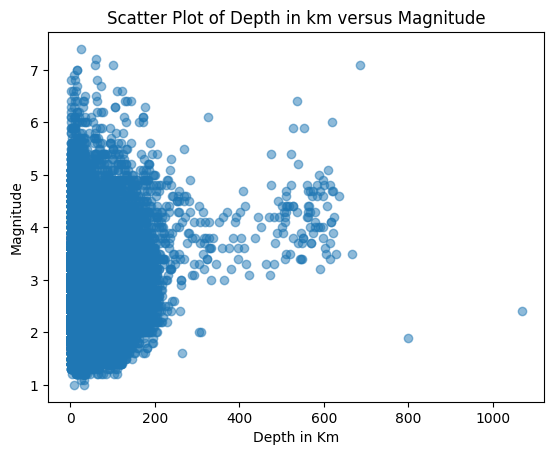

In [51]:
# SCATTER PLOT FOR DEPTH VS MAGNITUDE

plt.scatter(clean['Depth_In_Km'], clean['Magnitude'], alpha=0.5)

plt.xlabel('Depth in Km')
plt.ylabel('Magnitude')
plt.title('Scatter Plot of Depth in km versus Magnitude')

plt.show()

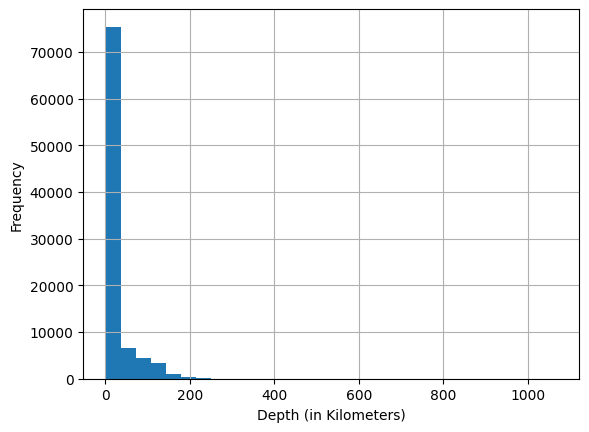

In [54]:
# DEPTH VS FREQUENCY OF EQ

# clean.describe()
clean['Depth_In_Km'].hist(bins=30)
plt.xlabel('Depth (in Kilometers)')
plt.ylabel('Frequency')
plt.show()

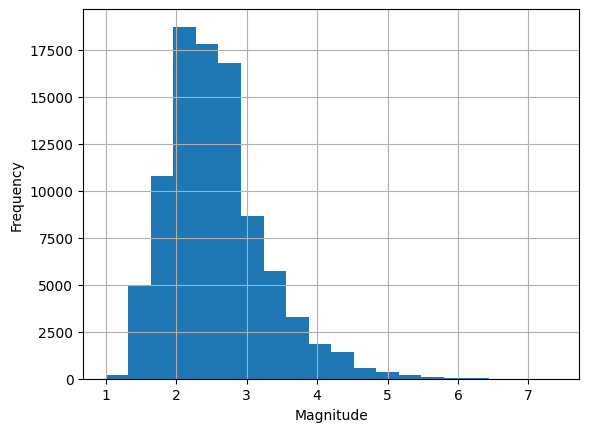

In [53]:
# MAGNITUDE VS FREQUENCY OF EQ

clean['Magnitude'].hist(bins=20)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()